In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv('economy.csv')

In [22]:
df.shape

(20, 3)

In [23]:
df.head()

,unemplyment_rate,interest_Rate,index_price
0,5.3,2.50,1463
1,5.3,2.50,1369
2,5.4,2.50,1352
3,5.4,2.50,1251
4,5.5,2.25,1200


In [24]:
df.isnull().sum()

unemplyment_rate    0
interest_Rate       0
index_price         0
dtype: int64

In [25]:
df.corr()

,unemplyment_rate,interest_Rate,index_price
unemplyment_rate,1.000000,-0.642378,-0.679697
interest_Rate,-0.642378,1.000000,0.958633
index_price,-0.679697,0.958633,1.000000


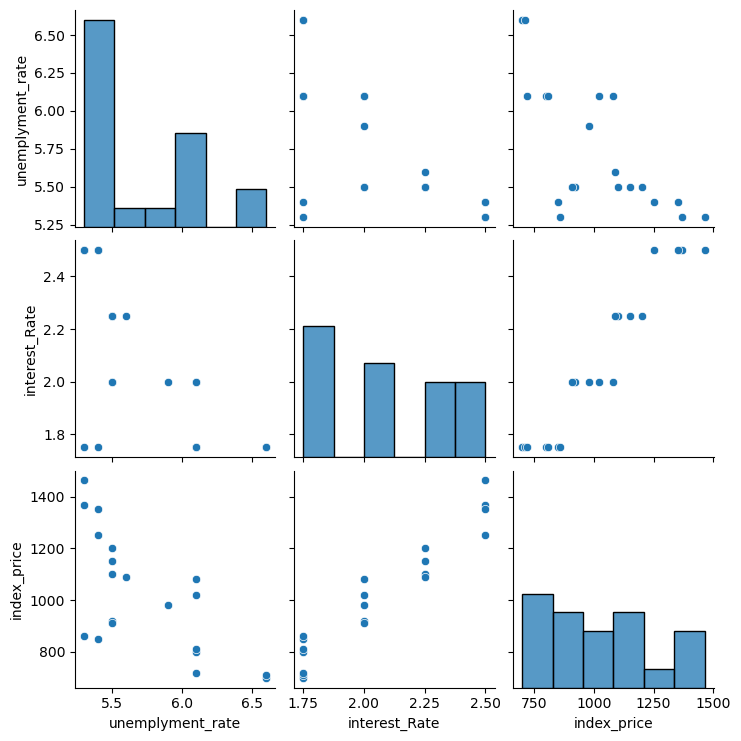

In [26]:
sns.pairplot(df)

In [27]:
##take the independent and dependent variable

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [28]:
X

,unemplyment_rate,interest_Rate
0,5.3,2.50
1,5.3,2.50
2,5.4,2.50
3,5.4,2.50
4,5.5,2.25
5,5.5,2.25
6,5.5,2.25
7,5.6,2.25
8,6.1,2.00
9,6.1,2.00


In [29]:
y

0     1463
1     1369
2     1352
3     1251
4     1200
5     1150
6     1100
7     1090
8     1080
9     1020
10     980
11     920
12     910
13     800
14     810
15     850
16     860
17     700
18     710
19     720
Name: index_price, dtype: int64

In [30]:
## convert into the training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
## standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [32]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [33]:
X_train

array([[-0.65465367,  0.76509206],
       [-0.65465367, -0.19127301],
       [-0.92742603,  1.72145713],
       [ 2.34584232, -1.14763808],
       [-1.2001984 , -1.14763808],
       [ 0.98198051, -1.14763808],
       [-0.92742603,  1.72145713],
       [ 0.98198051, -0.19127301],
       [ 0.98198051, -1.14763808],
       [-0.65465367,  0.76509206],
       [-0.65465367, -0.19127301],
       [-0.38188131,  0.76509206],
       [ 0.43643578, -0.19127301],
       [ 0.98198051, -1.14763808],
       [-0.65465367,  0.76509206]])

In [34]:
X_test

array([[-1.2001984 ,  1.72145713],
       [ 2.34584232, -1.14763808],
       [-0.92742603, -1.14763808],
       [-1.2001984 ,  1.72145713],
       [ 0.98198051, -0.19127301]])

<Axes: xlabel='unemplyment_rate', ylabel='interest_Rate'>

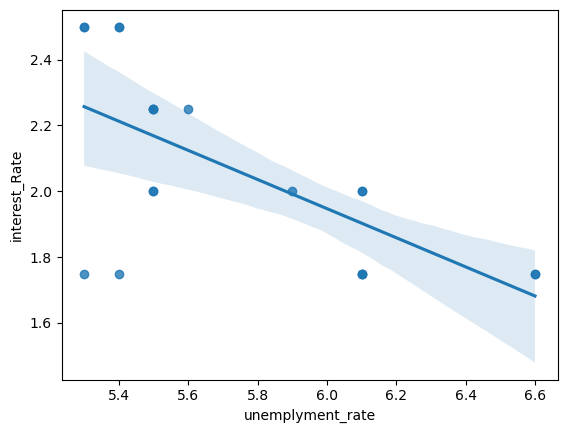

In [39]:
##regplot in seaborn

sns.regplot(x='unemplyment_rate', y='interest_Rate', data=df)

In [40]:
##now we train the model
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [41]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
##cross validation
from sklearn.model_selection import cross_val_score